In [16]:
import pandas as pd
from autogluon.timeseries import TimeSeriesDataFrame, TimeSeriesPredictor

In [17]:
# Load data of IT closing transaction
df = pd.read_csv('../CSV/ClosingTransaction_TPIT.csv', sep=';')

df.head()


,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,...,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5637225788,31/12/2017 00:00,11/12/2017 16:37,5637173886,E41060IC,Consultant Costs,5637145326,0,PR000001,IT01,...,5637145693,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,1733680000,EUR,Post vendor invoice,ACT01
1,5637225789,31/12/2017 00:00,11/12/2017 16:37,5637173897,L20201,Trade Accounts Payable - Bill Not Receiv,5637145326,0,PR000001,IT01,...,5637145529,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,-1733680000,EUR,Post vendor invoice,ACT01
2,5637233421,12/01/2017 00:00,11/12/2017 20:14,5637175112,E41040IC,Employee Benefits,5637145326,0,1100000037,it01,...,5637145765,LEASYS - M.C. Doria FE140WD 01/17,0.0,Daily,12149.0,20.0,326230000,EUR,Post all adjustments in ledger,ACT32
3,5637235692,24/01/2017 00:00,11/12/2017 20:14,5637175123,L20220,VAT Payable,5637145326,0,200000045,it01,...,5637145547,NaN,0.0,Daily,12149.0,4.0,-3883230000,EUR,Post all adjustments in ledger,ACT32
4,5637235730,30/01/2017 00:00,11/12/2017 20:14,5637176287,A10100,Trade Accounts Receivable,5637145326,0,200000059,it01,...,5637145443,ENEL SE-50046-12/16,0.0,Daily,12149.0,3.0,46090210000,EUR,Post and settle all received payments,ACT09


In [18]:
# Dataset dimension
df.shape

(835134, 24)

In [19]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835134 entries, 0 to 835133
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   GjaeRecId                   835134 non-null  int64  
 1   AccountingDate              835134 non-null  object 
 2   CreatedDateTime             835134 non-null  object 
 3   LedgerDimension             835134 non-null  int64  
 4   GroupChartOfAccountsValue   835134 non-null  object 
 5   GroupChartOfAccountsName    835134 non-null  object 
 6   Ledger                      835134 non-null  int64  
 7   PostingLayer                835134 non-null  int64  
 8   SubledgerVoucher            835134 non-null  object 
 9   SubledgerVoucherDataAreaId  835134 non-null  object 
 10  CreatedBy                   835134 non-null  object 
 11  JournalCategory             698624 non-null  object 
 12  PostingTypeLabel            826696 non-null  object 
 13  PostingTypeVal

In [20]:
# Change SubledgerVoucherDataAreaId field from lower case to upper case
df['SubledgerVoucherDataAreaId'] = df['SubledgerVoucherDataAreaId'].str.upper()

In [21]:
# Date format of CreatedDateTime column
df['CreatedDateTime'] = pd.to_datetime(df['CreatedDateTime'], format='%d/%m/%Y %H:%M')
df.head()

,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,...,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5637225788,31/12/2017 00:00,2017-12-11 16:37:00,5637173886,E41060IC,Consultant Costs,5637145326,0,PR000001,IT01,...,5637145693,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,1733680000,EUR,Post vendor invoice,ACT01
1,5637225789,31/12/2017 00:00,2017-12-11 16:37:00,5637173897,L20201,Trade Accounts Payable - Bill Not Receiv,5637145326,0,PR000001,IT01,...,5637145529,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,-1733680000,EUR,Post vendor invoice,ACT01
2,5637233421,12/01/2017 00:00,2017-12-11 20:14:00,5637175112,E41040IC,Employee Benefits,5637145326,0,1100000037,IT01,...,5637145765,LEASYS - M.C. Doria FE140WD 01/17,0.0,Daily,12149.0,20.0,326230000,EUR,Post all adjustments in ledger,ACT32
3,5637235692,24/01/2017 00:00,2017-12-11 20:14:00,5637175123,L20220,VAT Payable,5637145326,0,200000045,IT01,...,5637145547,NaN,0.0,Daily,12149.0,4.0,-3883230000,EUR,Post all adjustments in ledger,ACT32
4,5637235730,30/01/2017 00:00,2017-12-11 20:14:00,5637176287,A10100,Trade Accounts Receivable,5637145326,0,200000059,IT01,...,5637145443,ENEL SE-50046-12/16,0.0,Daily,12149.0,3.0,46090210000,EUR,Post and settle all received payments,ACT09


In [22]:
# Set all time of createdDateTime column to 00:00:00 to avoid error
df['CreatedDateTime'] = df['CreatedDateTime'].dt.strftime('%d/%m/%Y 00:00:00')

# Convert CreatedDateTime column to datetime format
df['CreatedDateTime'] = pd.to_datetime(df['CreatedDateTime'], format='%d/%m/%Y %H:%M:%S')
df.head()


,GjaeRecId,AccountingDate,CreatedDateTime,LedgerDimension,GroupChartOfAccountsValue,GroupChartOfAccountsName,Ledger,PostingLayer,SubledgerVoucher,SubledgerVoucherDataAreaId,...,MainAccount,Text,JournalType,JournalTypeLabel,NumOfLines,CountLedgerJournal,TransactionCurrencyAmount,TransactionCurrencyCode,ClosingActivityDescription,ClosingActivityId
0,5637225788,31/12/2017 00:00,2017-12-11,5637173886,E41060IC,Consultant Costs,5637145326,0,PR000001,IT01,...,5637145693,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,1733680000,EUR,Post vendor invoice,ACT01
1,5637225789,31/12/2017 00:00,2017-12-11,5637173897,L20201,Trade Accounts Payable - Bill Not Receiv,5637145326,0,PR000001,IT01,...,5637145529,"DDT Nr: Ceccomori-cons.12/17, Internal Nr: PR0...",NaN,NaN,NaN,NaN,-1733680000,EUR,Post vendor invoice,ACT01
2,5637233421,12/01/2017 00:00,2017-12-11,5637175112,E41040IC,Employee Benefits,5637145326,0,1100000037,IT01,...,5637145765,LEASYS - M.C. Doria FE140WD 01/17,0.0,Daily,12149.0,20.0,326230000,EUR,Post all adjustments in ledger,ACT32
3,5637235692,24/01/2017 00:00,2017-12-11,5637175123,L20220,VAT Payable,5637145326,0,200000045,IT01,...,5637145547,NaN,0.0,Daily,12149.0,4.0,-3883230000,EUR,Post all adjustments in ledger,ACT32
4,5637235730,30/01/2017 00:00,2017-12-11,5637176287,A10100,Trade Accounts Receivable,5637145326,0,200000059,IT01,...,5637145443,ENEL SE-50046-12/16,0.0,Daily,12149.0,3.0,46090210000,EUR,Post and settle all received payments,ACT09


In [23]:
# Create a new df with only CreatedDateTime and count of rows (transactions) per day and the field SubledgerVoucherDataAreaId
df_TS = df.groupby(['SubledgerVoucherDataAreaId', 'CreatedDateTime']).size().reset_index(name='count')
df_TS.head()

,SubledgerVoucherDataAreaId,CreatedDateTime,count
0,IT01,2017-12-11,13590
1,IT01,2017-12-12,66944
2,IT01,2017-12-13,83
3,IT01,2017-12-14,118
4,IT01,2017-12-15,8765


In [24]:
# Change name columns SubledgerVoucherDataAreaId to AreaId, CreatedDateTime to Timestamp and count to Target
df_TS = df_TS.rename(columns={'SubledgerVoucherDataAreaId': 'AreaId', 'CreatedDateTime': 'Timestamp', 'count': 'target'})
df_TS.head()


,AreaId,Timestamp,target
0,IT01,2017-12-11,13590
1,IT01,2017-12-12,66944
2,IT01,2017-12-13,83
3,IT01,2017-12-14,118
4,IT01,2017-12-15,8765


In [25]:
# Sum all values of Target in total
df_TS['target'].sum()


835134

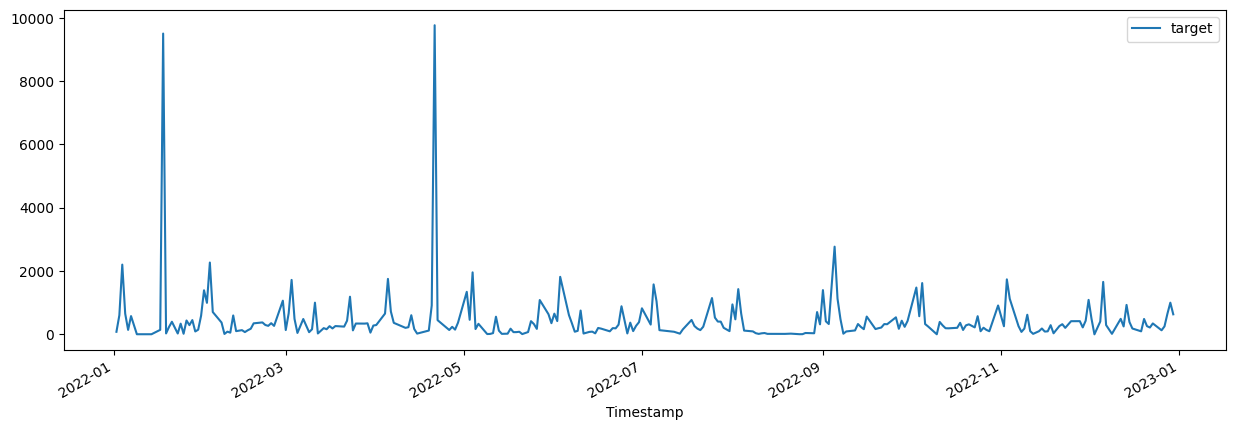

In [26]:
import matplotlib.pyplot as plt

# Plot the trend of Target per day of year 2022
df_TS[df_TS['Timestamp'].dt.year == 2022].plot(x='Timestamp', y='target', figsize=(15, 5))
plt.show()


In [27]:
# Split the dataset in train and test set: train set is all data before 2023 and test set is all data of 2023
train_data = df_TS[df_TS['Timestamp'].dt.year < 2023]
test_data = df_TS[df_TS['Timestamp'].dt.year == 2023]

In [28]:
# Create a time series dataframe from train data
train_data = TimeSeriesDataFrame.from_data_frame(
    train_data,
    id_column="AreaId",
    timestamp_column="Timestamp"
)
train_data.head()

target
item_id timestamp         
IT01    2017-12-11   13590
        2017-12-12   66944
        2017-12-13      83
        2017-12-14     118
        2017-12-15    8765

In [29]:
# Make a prediction with AutoGluon for 30 days

predictor = TimeSeriesPredictor(
    prediction_length=30,
    path="Predictions_TPIT",
    target="target",
    eval_metric="MASE",
    freq="1D",
)

predictor.fit(
    train_data,
    presets="medium_quality",
)

Frequency '1D' stored as 'D'
Beginning AutoGluon training...
AutoGluon will save models to 'Predictions_TPIT'
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.9.12
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.22631
CPU Count:          8
GPU Count:          0
Memory Avail:       6.71 GB / 15.78 GB (42.5%)
Disk Space Avail:   124.72 GB / 475.83 GB (26.2%)
Setting presets to: medium_quality

Fitting with arguments:
{'enable_ensemble': True,
 'eval_metric': MASE,
 'freq': 'D',
 'hyperparameters': 'light',
 'known_covariates_names': [],
 'num_val_windows': 1,
 'prediction_length': 30,
 'quantile_levels': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
 'random_seed': 123,
 'refit_every_n_windows': 1,
 'refit_full': False,
 'target': 'target',
 'verbosity': 2}

train_data with frequency 'None' has been resampled to frequency 'D'.
train_data contains missing values represented by NaN. They have been filled by 

In [30]:
# Make prediction on training data
predictions = predictor.predict(train_data)
predictions.head(30)

data with frequency 'None' has been resampled to frequency 'D'.


data contains missing values represented by NaN. They have been filled by carrying forward the last valid observation.
Model not specified in predict, will default to the model with the best validation score: WeightedEnsemble


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
IT01    2022-12-31  342.195993 -318.062524 -142.342726    6.351070   
        2023-01-01  224.889299 -402.560819 -176.024749   -1.640149   
        2023-01-02  467.945895 -410.097260 -116.529647   99.527286   
        2023-01-03  457.643103 -334.234233  -91.471355  103.620790   
        2023-01-04  527.871753 -195.164774  -10.313723  203.480587   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
IT01    2022-12-31  182.213509  342.195993  514.442101  667.977054   
        2023-01-01  108.964036  224.889299  369.121299  523.918044   
        2023-01-02  269.320804  467.945895  604.842305  844.859909   
        2023-01-03  263.792497  457.643103  654.184736  878.905379   
        2023-01-04  345.586992  527.871753  685.833657  921.805423   

                            0.8          0.9  
item_id timestamp                             
IT01    2022-12-31   871.808938  1191.104618  
        2023-01-01   682.336184   929.055839  
        2023-01-02  1056.664750  1457.734643  
        2023-01-03  1092.171756  1516.840004  
        2023-01-04  1227.433669  1650.167651

In [31]:
# Check shape of predictions
predictions.shape


mean         0.1         0.2         0.3  \
item_id timestamp                                                    
IT01    2022-12-31  342.195993 -318.062524 -142.342726    6.351070   
        2023-01-01  224.889299 -402.560819 -176.024749   -1.640149   
        2023-01-02  467.945895 -410.097260 -116.529647   99.527286   
        2023-01-03  457.643103 -334.234233  -91.471355  103.620790   
        2023-01-04  527.871753 -195.164774  -10.313723  203.480587   
        2023-01-05  504.685739 -296.487080  -49.940669  167.783973   
        2023-01-06  308.453397 -414.166648 -177.186699  -21.961944   
        2023-01-07  244.584510 -384.780779 -161.603524    0.614617   
        2023-01-08  282.431390 -437.141339 -181.976488  -23.895689   
        2023-01-09  244.904782 -367.793701 -168.828154  -41.101370   
        2023-01-10  259.449550 -426.824322 -222.332729  -29.280316   
        2023-01-11  200.657979 -342.034159 -191.362484  -40.569537   
        2023-01-12  258.467612 -441.386069 -209.962609  -19.002909   
        2023-01-13  254.065169 -409.633040 -205.058134  -18.487907   
        2023-01-14  206.967906 -430.653994 -194.623862  -24.180892   
        2023-01-15  192.852381 -420.217495 -216.726429  -77.147844   
        2023-01-16  232.710633 -473.048519 -283.858713  -94.695015   
        2023-01-17  266.681467 -405.000496 -177.691766  -23.542889   
        2023-01-18  241.907989 -514.561208 -264.345635  -64.611166   
        2023-01-19  261.412397 -438.829264 -224.873446  -58.841132   
        2023-01-20  289.678968 -516.231596 -283.893596  -56.067967   
        2023-01-21  244.300961 -406.600356 -116.594664  -15.350745   
        2023-01-22  277.992559 -472.965103 -170.467015   10.219671   
        2023-01-23  282.005479 -445.153800 -187.725776  -27.255226   
        2023-01-24  410.855650 -463.952136 -178.572697   40.239228   
        2023-01-25  252.377871 -540.039924 -240.920085  -87.404031   
        2023-01-26  302.777112 -369.954878 -122.551647   10.395678   
        2023-01-27  302.609381 -486.280590 -241.725606  -33.118643   
        2023-01-28  343.412334 -381.732784 -105.134637   12.627467   
        2023-01-29  268.963978 -404.647733 -229.028909  -48.185745   

                           0.4         0.5         0.6         0.7  \
item_id timestamp                                                    
IT01    2022-12-31  182.213509  342.195993  514.442101  667.977054   
        2023-01-01  108.964036  224.889299  369.121299  523.918044   
        2023-01-02  269.320804  467.945895  604.842305  844.859909   
        2023-01-03  263.792497  457.643103  654.184736  878.905379   
        2023-01-04  345.586992  527.871753  685.833657  921.805423   
        2023-01-05  325.089855  504.685739  718.426666  918.311584   
        2023-01-06  123.384265  308.453397  467.923951  620.257987   
        2023-01-07  102.095997  244.584510  391.220720  524.068675   
        2023-01-08  122.584815  282.431390  388.206218  536.391415   
        2023-01-09   82.026090  244.904782  375.435915  510.149049   
        2023-01-10  114.600385  259.449550  396.537482  533.395006   
        2023-01-11   78.379305  200.657979  341.265237  507.607444   
        2023-01-12  132.778980  258.467612  410.651796  568.811995   
        2023-01-13  107.260549  254.065169  364.523710  510.853707   
        2023-01-14   70.768540  206.967906  296.241905  446.478284   
        2023-01-15   48.080930  192.852381  310.749625  433.847345   
        2023-01-16   80.508364  232.710633  378.245463  560.895063   
        2023-01-17  118.993671  266.681467  421.700052  567.834571   
        2023-01-18   80.432899  241.907989  379.348985  556.589150   
        2023-01-19  108.067266  261.412397  388.509699  512.707377   
        2023-01-20  111.833630  289.678968  387.704003  584.546639   
        2023-01-21  135.248320  244.300961  420.263677  567.738909   
        2023-01-22  117.544797  277.992559  393.145610  566.211750   
        2023-01-23  138.318945  282

In [32]:
# Take only first 30 day of test data
# Add missing dates to test data in the month of January 2023 (from 2023-01-01 to 2023-01-31) and fill target with .ffill()
test_data = test_data.set_index('Timestamp').resample('D').ffill().reset_index()
test_data = test_data[test_data['Timestamp'] < '2023-02-01']
test_data.head(30)


,Timestamp,AreaId,target
0,2023-01-02,IT01,720
1,2023-01-03,IT01,735
2,2023-01-04,IT01,1989
3,2023-01-05,IT01,674
4,2023-01-06,IT01,674
5,2023-01-07,IT01,29
6,2023-01-08,IT01,10
7,2023-01-09,IT01,10
8,2023-01-10,IT01,20
9,2023-01-11,IT01,7


In [41]:
# Change column AreaId to item_id of test data
test_data = test_data.rename(columns={'AreaId': 'item_id'})
test_data = test_data.rename(columns={'Timestamp': 'timestamp'})
test_data.head()

,timestamp,item_id,target
0,2023-01-02,IT01,720
1,2023-01-03,IT01,735
2,2023-01-04,IT01,1989
3,2023-01-05,IT01,674
4,2023-01-06,IT01,674


In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 3))

item_id = "IT01"
y_past = train_data.loc[item_id]["target"]
y_pred = predictions.loc[item_id]
y_test = test_data.loc[item_id]["target"]

plt.plot(y_past[-60:], label="Past time series values")
plt.plot(y_pred["mean"], label="Mean forecast")
plt.plot(y_test, label="Future time series values")

plt.fill_between(
    y_pred.index, y_pred["0.1"], y_pred["0.9"], color="red", alpha=0.1, label=f"10%-90% confidence interval"
)
plt.legend();

KeyError: 'IT01'

<Figure size 2000x300 with 0 Axes>

In [43]:
# Leaderboard of the model
predictor.leaderboard(test_data)

ValueError: Cannot reserve last prediction_length=30 time steps for evaluation in some time series in data. Please make sure that data includes both historic and future data, and thatall time series have length > prediction_length (at least 31)